# Metrics in Machine Learning and Statistical Modeling

In this notebook, we will explore and visualize a few important metrics used for model evaluation: **Log Predictive Density (LPD)**, **Brier Score**, and **Ranked Probability Score (RPS)**. These metrics are commonly used in probabilistic modeling, classification, and regression tasks.

---

## Log Predictive Density (LPD)

### What is Log Predictive Density?

Log Predictive Density (LPD) measures how well a probabilistic model predicts observed data. It is the logarithm of the likelihood of the observed data under the model, which provides a score that can be used to compare models.

A higher LPD indicates better predictive performance, as the model assigns higher probability to the actual observed outcomes.

Mathematically, LPD for a single data point is given by:
$$
\text{LPD} = \log P(y_{\text{obs}} | \theta)
$$
where $ y_{\text{obs}} $ is the observed outcome and $ \theta $ represents the parameters of the model.


### How the LPD Function Looks

The LPD function is based on the probability density function (PDF) of the predicted distribution. For a Gaussian distribution, the LPD for a single data point $ y_{\text{obs}} $ is:

$$
\text{LPD} = \log P(y_{\text{obs}} | \theta) = \log \left(\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_{\text{obs}} - \mu)^2}{2\sigma^2}\right)\right)
$$

Where:
- $ \mu $ is the predicted mean,
- $ \sigma $ is the standard deviation (variance) of the prediction.

We can see that LPD ranges from $ -\infty $ to $ 0 $, where a larger (less negative) value indicates better predictive performance.

### Visualization of LPD

We will now plot different distributions of predicted probabilities and show how the Log Predictive Density changes for various models.

### Good Prediction vs. Poor Prediction

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

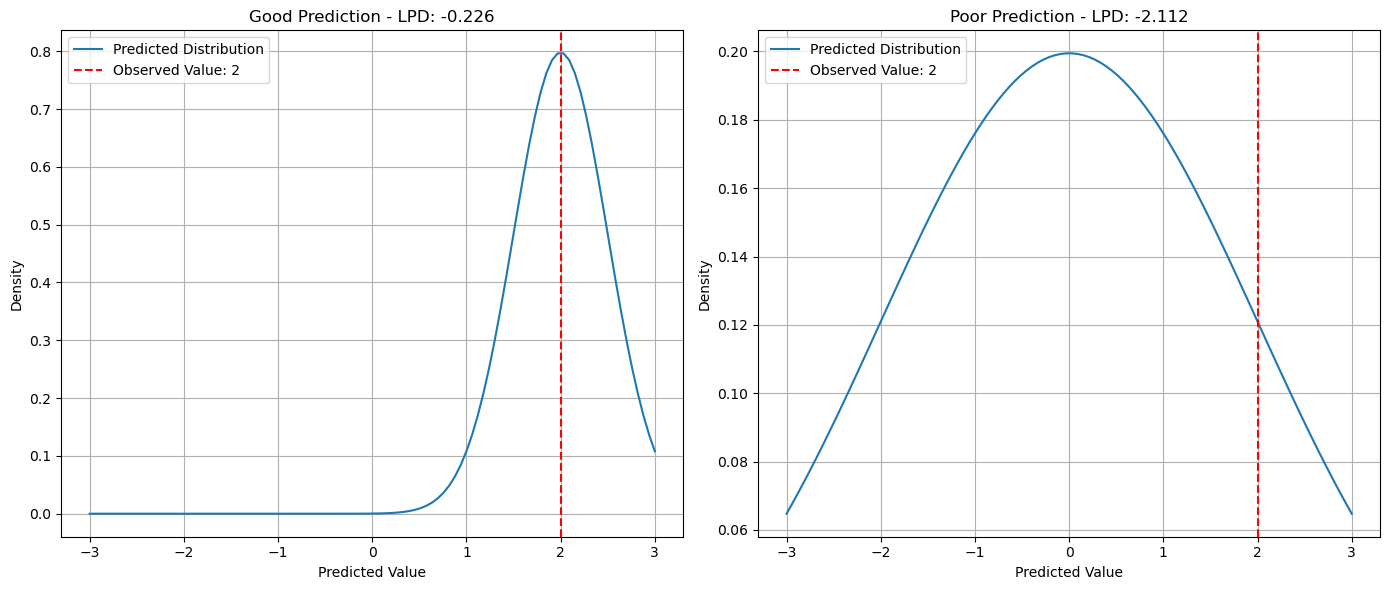

In [7]:
# Good Prediction: high LPD
y_obs_good = 2  # observed value
predicted_mean_good = 2  # predicted mean is close to the observed value
predicted_std_good = 0.5  # small standard deviation

# LPD for good prediction
lpd_good = np.log(norm.pdf(y_obs_good, loc=predicted_mean_good, scale=predicted_std_good))

# Plotting for Good Prediction
x_good = np.linspace(-3, 3, 100)
good_plot = norm.pdf(x_good, loc=predicted_mean_good, scale=predicted_std_good)

# Case 2: Poor Prediction (Low LPD)
y_obs_poor = 2  # observed value
predicted_mean_poor = 0  # predicted mean far from the observed value
predicted_std_poor = 2  # larger standard deviation

# LPD for poor prediction
lpd_poor = np.log(norm.pdf(y_obs_poor, loc=predicted_mean_poor, scale=predicted_std_poor))

# Plotting for Poor Prediction
x_poor = np.linspace(-3, 3, 100)
poor_plot = norm.pdf(x_poor, loc=predicted_mean_poor, scale=predicted_std_poor)

# Side-by-side Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Good Prediction Plot
ax[0].plot(x_good, good_plot, label="Predicted Distribution")
ax[0].axvline(y_obs_good, color='r', linestyle='--', label=f'Observed Value: {y_obs_good}')
ax[0].set_title(f'Good Prediction - LPD: {lpd_good:.3f}')
ax[0].set_xlabel('Predicted Value')
ax[0].set_ylabel('Density')
ax[0].legend()
ax[0].grid(True)

# Poor Prediction Plot
ax[1].plot(x_poor, poor_plot, label="Predicted Distribution")
ax[1].axvline(y_obs_poor, color='r', linestyle='--', label=f'Observed Value: {y_obs_poor}')
ax[1].set_title(f'Poor Prediction - LPD: {lpd_poor:.3f}')
ax[1].set_xlabel('Predicted Value')
ax[1].set_ylabel('Density')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

---

# Brier Score

#### What is the Brier Score?

The **Brier Score** is a metric used to evaluate the accuracy of probabilistic predictions. It measures the mean squared difference between predicted probabilities and actual outcomes. The formula for the Brier Score is:

$$
\text{Brier Score} = \frac{1}{N} \sum_{i=1}^{N} (p_i - o_i)^2
$$

Where:
- $ p_i $ is the predicted probability for the event $i$,
- $ o_i $ is the observed outcome (1 if the event occurred, 0 if not),
- $ N $ is the number of observations.

The Brier Score ranges from 0 to 1:
- A score of 0 indicates perfect predictions,
- A score of 1 indicates the worst possible prediction.

Lower Brier Scores reflect better model performance in terms of predicting probabilities that align with actual outcomes.


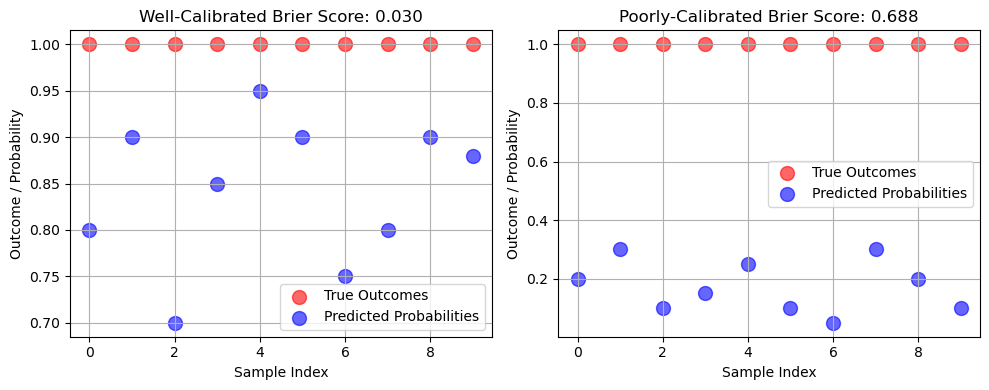

In [14]:
# Case 1: Well-calibrated prediction (more data points)
y_pred_well = np.array([0.8, 0.9, 0.7, 0.85, 0.95, 0.9, 0.75, 0.8, 0.9, 0.88])  # predicted probabilities close to true values
y_true_well = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])  # true outcomes

# Calculate Brier score for well-calibrated prediction
brier_score_well = np.mean((y_pred_well - y_true_well) ** 2)

# Case 2: Poorly-calibrated prediction (more data points)
y_pred_poor = np.array([0.2, 0.3, 0.1, 0.15, 0.25, 0.1, 0.05, 0.3, 0.2, 0.1])  # predicted probabilities far from true values
y_true_poor = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])  # true outcomes

# Calculate Brier score for poorly-calibrated prediction
brier_score_poor = np.mean((y_pred_poor - y_true_poor) ** 2)

# Plotting both cases side by side with smaller and clearer graph
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plotting Well-Calibrated Prediction
ax[0].scatter(range(len(y_true_well)), y_true_well, label='True Outcomes', color='r', s=100, alpha=0.6)
ax[0].scatter(range(len(y_pred_well)), y_pred_well, label='Predicted Probabilities', color='b', s=100, alpha=0.6)
ax[0].set_title(f'Well-Calibrated Brier Score: {brier_score_well:.3f}')
ax[0].set_xlabel('Sample Index')
ax[0].set_ylabel('Outcome / Probability')
ax[0].legend()
ax[0].grid(True)

# Plotting Poorly-Calibrated Prediction
ax[1].scatter(range(len(y_true_poor)), y_true_poor, label='True Outcomes', color='r', s=100, alpha=0.6)
ax[1].scatter(range(len(y_pred_poor)), y_pred_poor, label='Predicted Probabilities', color='b', s=100, alpha=0.6)
ax[1].set_title(f'Poorly-Calibrated Brier Score: {brier_score_poor:.3f}')
ax[1].set_xlabel('Sample Index')
ax[1].set_ylabel('Outcome / Probability')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


### Another example for Brier score using severities

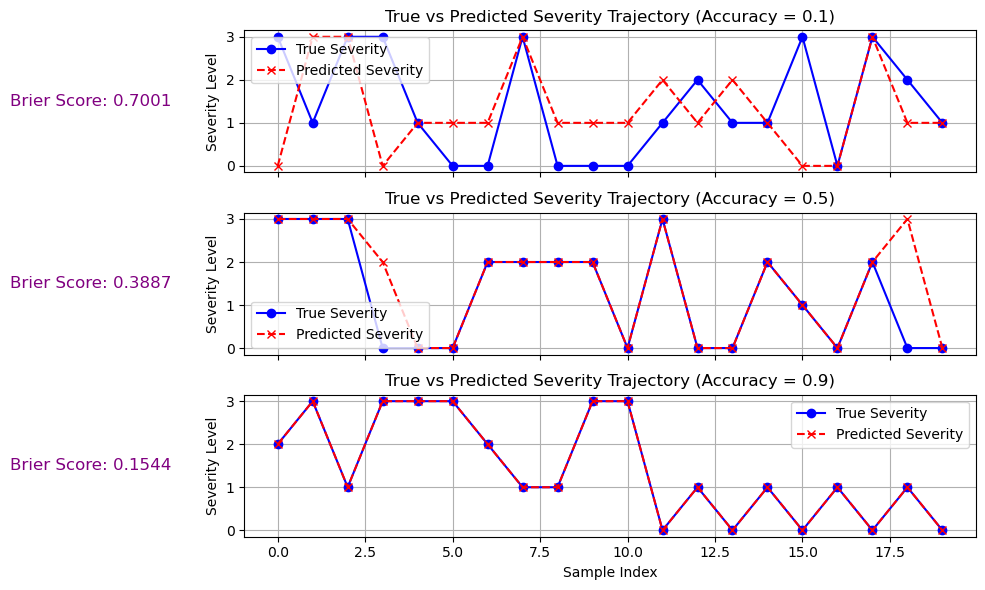

In [20]:
# Helper function to simulate predictions with different accuracies and severities
def simulate_severity_predictions(n, accuracy):
    true_outcomes = np.random.randint(0, 4, size=n)
    predicted_probs = []

    for true in true_outcomes:
        if true == 3:
            prob_dist = np.array([0.1, 0.1, 0.1, 0.7]) * accuracy + np.random.dirichlet(np.ones(4)) * (1 - accuracy)
        elif true == 2:
            prob_dist = np.array([0.1, 0.1, 0.7, 0.1]) * accuracy + np.random.dirichlet(np.ones(4)) * (1 - accuracy)
        elif true == 1:
            prob_dist = np.array([0.1, 0.7, 0.1, 0.1]) * accuracy + np.random.dirichlet(np.ones(4)) * (1 - accuracy)
        else:
            prob_dist = np.array([0.7, 0.1, 0.1, 0.1]) * accuracy + np.random.dirichlet(np.ones(4)) * (1 - accuracy)
        
        prob_dist = prob_dist / prob_dist.sum()
        predicted_probs.append(prob_dist)
    
    return true_outcomes, np.array(predicted_probs)

# Calculate Brier score for multi-class severity
def brier_score_multiclass(true_outcomes, predicted_probs, num_classes=4):
    brier_score = 0.0
    n = len(true_outcomes)
    
    for i in range(n):
        true_dist = np.zeros(num_classes)
        true_dist[true_outcomes[i]] = 1
        brier_score += np.sum((predicted_probs[i] - true_dist) ** 2)
    
    return brier_score / n

# Simulate different accuracy levels for severity predictions
scenarios = [0.1, 0.5, 0.9]
brier_scores = []
trajectories = {}

for accuracy in scenarios:
    y_true, y_pred_probs = simulate_severity_predictions(20, accuracy)
    score = brier_score_multiclass(y_true, y_pred_probs)
    brier_scores.append(score)
    
    # Save the trajectories for plotting
    trajectories[accuracy] = (y_true, y_pred_probs)

# Plot true and predicted trajectories for each accuracy level
fig, axes = plt.subplots(len(scenarios), 1, figsize=(10, 2*len(scenarios)), sharex=True)

for i, accuracy in enumerate(scenarios):
    y_true, y_pred_probs = trajectories[accuracy]
    y_pred_severities = np.argmax(y_pred_probs, axis=1)
    
    # Plot the true and predicted severity
    axes[i].plot(range(len(y_true)), y_true, label='True Severity', marker='o', linestyle='-', color='blue')
    axes[i].plot(range(len(y_pred_severities)), y_pred_severities, label='Predicted Severity', marker='x', linestyle='--', color='red')
    
    # Display the Brier score on the left side of each subplot
    brier_score = brier_scores[i]
    axes[i].text(-0.1, 0.5, f"Brier Score: {brier_score:.4f}", transform=axes[i].transAxes, fontsize=12, verticalalignment='center', horizontalalignment='right', color='purple')

    axes[i].set_title(f"True vs Predicted Severity Trajectory (Accuracy = {accuracy})")
    axes[i].set_ylabel("Severity Level")
    axes[i].legend()
    axes[i].grid(True)

axes[-1].set_xlabel("Sample Index")
plt.tight_layout()
plt.show()


# Ranked Probability Score (RPS)

The **Ranked Probability Score (RPS)** is a measure used to evaluate probabilistic forecasts of ordered outcomes. It calculates the difference between the predicted cumulative probabilities and the observed probabilities for ordered events (e.g., severity levels). The RPS takes into account the relative ranking of predicted probabilities across different possible outcomes.

The formula for RPS is:

$$
RPS = \frac{1}{N} \sum_{i=1}^{N} \left( \sum_{k=1}^{L} (F_k(i) - O_k(i))^2 \right)
$$

Where:

- $ N $ is the number of predictions (samples),
- $ L $ is the number of possible outcomes (in this case, 4 severity levels),
- $ F_k(i) $ is the cumulative probability for outcome $ k $ predicted for sample $ i $,
- $ O_k(i) $ is the cumulative observed probability for outcome $ k $ (which is 1 for the true class and 0 for others).

#### Steps for Calculating RPS:

1. **Compute Cumulative Predicted Probabilities:** For each prediction, generate the cumulative probabilities for the classes. For example, if the predicted probabilities for severity levels are $ p_0, p_1, p_2, p_3 $, the cumulative probabilities would be:
    - $ F_0 = p_0 $,
    - $ F_1 = p_0 + p_1 $,
    - $ F_2 = p_0 + p_1 + p_2 $,
    - $ F_3 = 1 $.

2. **Compute Cumulative Observed Probabilities:** For each true class, the cumulative observed probabilities will be 0 for all classes except the true class, where the cumulative probability will be 1:
    - For a true class 0, $ O_0 = 1, O_1 = O_2 = O_3 = 0 $,
    - For a true class 1, $ O_1 = 1, O_0 = O_2 = O_3 = 0 $,
    - For a true class 2, $ O_2 = 1, O_0 = O_1 = O_3 = 0 $,
    - For a true class 3, $ O_3 = 1, O_0 = O_1 = O_2 = 0 $.

3. **Calculate RPS:** Compute the squared difference between the cumulative predicted and observed probabilities for each class, and then sum over all classes. The RPS is the average of these squared differences over all samples.


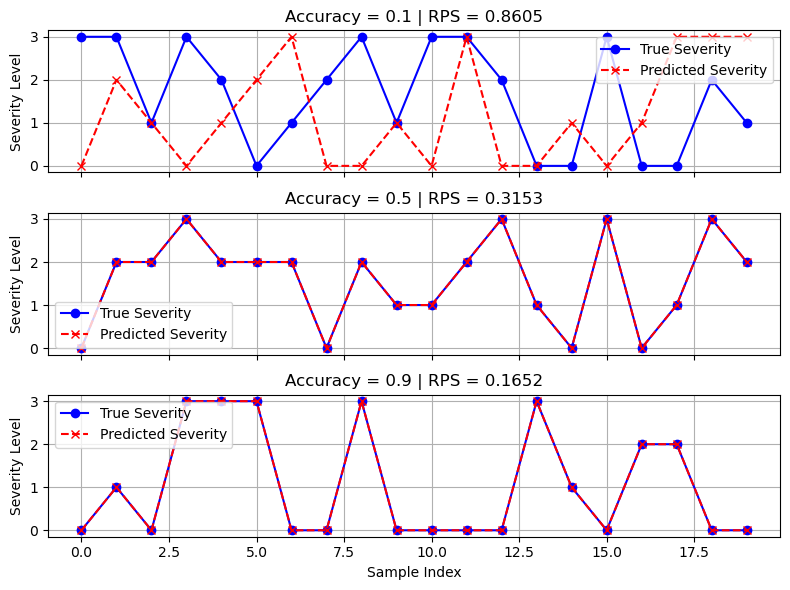

In [23]:
# Calculate Ranked Probability Score (RPS)
def ranked_probability_score(true_outcomes, predicted_probs, num_classes=4):
    rps = 0.0
    n = len(true_outcomes)
    
    for i in range(n):
        true_dist = np.zeros(num_classes)
        true_dist[true_outcomes[i]] = 1
        
        # Compute cumulative probabilities for prediction and true outcomes
        F_pred = np.cumsum(predicted_probs[i])
        O_true = np.cumsum(true_dist)
        
        rps += np.sum((F_pred - O_true) ** 2)
    
    return rps / n

# Simulate different accuracy levels for severity predictions
scenarios = [0.1, 0.5, 0.9]  # Different levels of prediction accuracy
rps_scores = []
trajectories = {}

for accuracy in scenarios:
    y_true, y_pred_probs = simulate_severity_predictions(20, accuracy)
    
    # Calculate RPS and Brier Score
    rps_score = ranked_probability_score(y_true, y_pred_probs)
    
    rps_scores.append(rps_score)
    
    # Save the trajectories for plotting
    trajectories[accuracy] = (y_true, y_pred_probs)

# Plot true and predicted trajectories for each accuracy level
fig, axes = plt.subplots(len(scenarios), 1, figsize=(8, 2*len(scenarios)), sharex=True)

for i, accuracy in enumerate(scenarios):
    y_true, y_pred_probs = trajectories[accuracy]
    y_pred_severities = np.argmax(y_pred_probs, axis=1)
    
    axes[i].plot(range(len(y_true)), y_true, label='True Severity', marker='o', linestyle='-', color='blue')
    axes[i].plot(range(len(y_pred_severities)), y_pred_severities, label='Predicted Severity', marker='x', linestyle='--', color='red')
    
    # Display RPS
    axes[i].set_title(f"Accuracy = {accuracy} | RPS = {rps_scores[i]:.4f}")
    axes[i].set_ylabel("Severity Level")
    axes[i].legend()
    axes[i].grid(True)

axes[-1].set_xlabel("Sample Index")
plt.tight_layout()
plt.show()